# Objectness Classification DataModule EDA

In [1]:
import os
import sys
import git
import matplotlib.pyplot as plt
import lightning as L

git_repo = git.Repo(os.getcwd(), search_parent_directories=True)
git_root = git_repo.git.rev_parse("--show-toplevel")

sys.path.append(f"{git_root}/objectness_classification/")
from datamodule import ObjnessClsDataModule

dataset_dir = os.path.join(os.path.expanduser("~"), "Documents/datasets")

## Ego4D dataset

In [1]:
from ego4d import Ego4DObjnessClsDataset

download = False

if download:
    # Download data for training
    Ego4DObjnessClsDataset(
        dataset_dir=dataset_dir,
        extract=True,
    )
    # Download data for validation
    Ego4DObjnessClsDataset(
        dataset_dir=dataset_dir,
        phase='val',
        extract=True,
    )

In [6]:
L.seed_everything(42, workers=True)
iter_counter = 0

ego4d_dataset = ObjnessClsDataModule(
    dataset_dir=dataset_dir,
    batch_size=1,
    transform_mode='display',
    with_info=True,
)
ego4d_dataset.setup()

ego4d_train_dataloader = iter(ego4d_dataset.train_dataloader())

Global seed set to 42


iter counter: 4
frames: torch.Size([1, 3, 3, 224, 224]), torch.float32
labels: torch.Size([1, 3, 3, 224, 224]), torch.float64
index: tensor([14722])
clip uid: ['e1d8fa76-b4cf-4430-b746-c4d6422b8470']
pnr at: tensor([671])


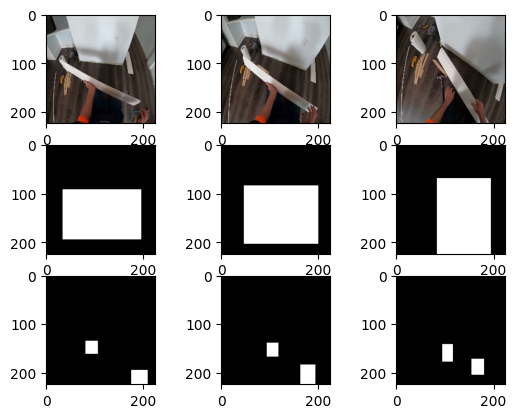

In [8]:
ego4d_frames, ego4d_labels, ego4d_info = next(ego4d_train_dataloader)
iter_counter += 1
print(
    f"iter counter: {iter_counter}",
    f"frames: {ego4d_frames.shape}, {ego4d_frames.dtype}",
    f"labels: {ego4d_labels.shape}, {ego4d_labels.dtype}",
    f"index: {ego4d_info['index']}",
    f"clip uid: {ego4d_info['clip_uid']}",
    f"pnr at: {ego4d_info['pnr_frame_num_clip']}",
    sep="\n"
)

pre_img = ego4d_frames[0][0].permute(1,2,0)
pre_mask = ego4d_labels[0][0]

pnr_img = ego4d_frames[0][1].permute(1,2,0)
pnr_mask = ego4d_labels[0][1]

post_img = ego4d_frames[0][2].permute(1,2,0)
post_mask = ego4d_labels[0][2]

fig = plt.figure()

fig.add_subplot(3, 3, 1)
plt.imshow(pre_img)
fig.add_subplot(3, 3, 4)
plt.imshow(pre_mask[1])
plt.gray()
fig.add_subplot(3, 3, 7)
plt.imshow(pre_mask[2])
plt.gray()

fig.add_subplot(3, 3, 2)
plt.imshow(pnr_img)
fig.add_subplot(3, 3, 5)
plt.imshow(pnr_mask[1])
plt.gray()
fig.add_subplot(3, 3, 8)
plt.imshow(pnr_mask[2])
plt.gray()

fig.add_subplot(3, 3, 3)
plt.imshow(post_img)
fig.add_subplot(3, 3, 6)
plt.imshow(post_mask[1])
plt.gray()
fig.add_subplot(3, 3, 9)
plt.imshow(post_mask[2])
plt.gray()

plt.show()

plt.clf()
plt.close()

## EgoHOS dataset

In [4]:
L.seed_everything(42, workers=True)
iter_counter = 0

egohos_dataset = ObjnessClsDataModule(
    dataset_dir=dataset_dir,
    dataset_mode="egohos",
    batch_size=1,
    transform_mode="display",
    with_info=True,
)
egohos_dataset.setup()

egohos_dataloader = iter(egohos_dataset.train_dataloader())

Global seed set to 42


iter counter: 1
frames: torch.Size([1, 3, 224, 224]), torch.float32
labels: torch.Size([1, 2, 224, 224]), torch.float64
file name: ('epic_P08_10_frame_0000007651',)


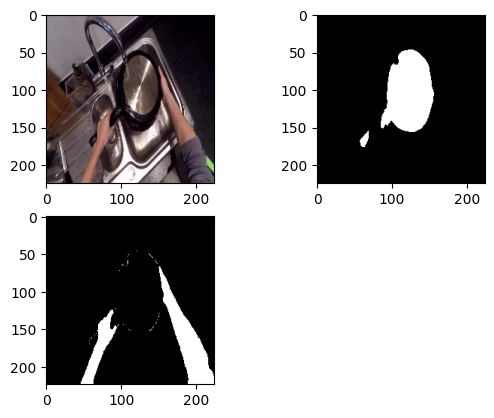

In [6]:
egohos_frames, egohos_labels, egohos_file = next(egohos_dataloader)
iter_counter += 1
print(
    f"iter counter: {iter_counter}",
    f"frames: {egohos_frames.shape}, {egohos_frames.dtype}",
    f"labels: {egohos_labels.shape}, {egohos_labels.dtype}",
    f"file name: {egohos_file}",
    sep="\n",
)

egohos_img = egohos_frames[0].permute(1,2,0)
egohos_mask = egohos_labels[0]

fig = plt.figure()

fig.add_subplot(2, 2, 1)
plt.imshow(egohos_img)

for cls in range(len(egohos_mask)):
    fig.add_subplot(2, 2, 2+cls)
    plt.imshow(egohos_mask[cls])
    plt.gray()

plt.show()

plt.clf()
plt.close()

## PASCAL VOC 2012 dataset

In [9]:
L.seed_everything(42, workers=True)
iter_counter = 0

voc2012_dataset = ObjnessClsDataModule(
    dataset_dir=dataset_dir,
    dataset_mode="voc2012",
    batch_size=1,
    transform_mode="display",
    with_info=True,
)
voc2012_dataset.setup()

voc2012_dataloader = iter(voc2012_dataset.train_dataloader())

Global seed set to 42


iter counter: 1
frames: torch.Size([1, 3, 224, 224]), torch.float32
labels: torch.Size([1, 2, 224, 224]), torch.int64
file name: ('2011_001463',)


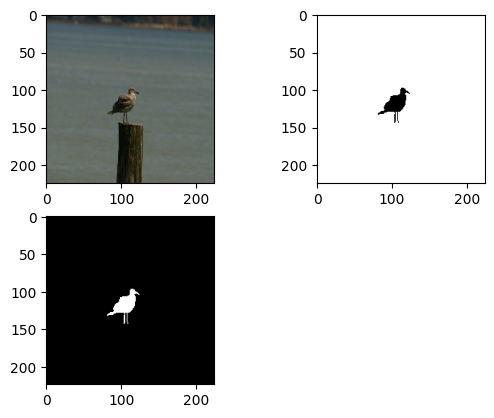

In [10]:
voc2012_frames, voc2012_labels, voc2012_file = next(voc2012_dataloader)
iter_counter += 1

print(
    f"iter counter: {iter_counter}",
    f"frames: {voc2012_frames.shape}, {voc2012_frames.dtype}",
    f"labels: {voc2012_labels.shape}, {voc2012_labels.dtype}",
    f"file name: {voc2012_file}",
    sep="\n",
)

voc2012_img = voc2012_frames[0].permute(1,2,0)
voc2012_mask = voc2012_labels[0]

fig = plt.figure()

fig.add_subplot(2, 2, 1)
plt.imshow(voc2012_img)

for cls in range(len(voc2012_mask)):
    fig.add_subplot(2, 2, 2+cls)
    plt.imshow(voc2012_mask[cls])
    plt.gray()

plt.show()

plt.clf()
plt.close()